In [1]:
import random

import torch
from torch import nn
from torch import optim
import gym
import matplotlib.pyplot as plt

In [2]:
class DeepQNetwork(nn.Module):
    def __init__(self, n_observations, n_actions):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_observations, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, n_actions),
        )
    
    def forward(self, x):
        return self.model(x)

In [3]:
# env = gym.make('LunarLander-v2')

In [4]:
env = gym.make('CartPole-v1')
n_actions = env.action_space.n
n_observations = env.observation_space.shape[0]

In [5]:
model = DeepQNetwork(n_observations=n_observations, n_actions=n_actions)
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [6]:
model

DeepQNetwork(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [7]:
observation, _ = env.reset()
observation = torch.from_numpy(observation)
model(observation)

tensor([ 0.1469, -0.0262], grad_fn=<AddBackward0>)

In [22]:
num_episodes = 1000
GAMMA = 0.9
EPSILON = 0.2
losses = []
rewards = [[] for _ in range(num_episodes)]

In [23]:
for i_episode in range(num_episodes):
    observation, _ = env.reset()
    observation = torch.from_numpy(observation)
    
    in_progress = True
    
    while in_progress:
                
        predicted_reward = model(observation)
        
        if (random.random() < EPSILON):
            action = torch.randint(n_actions, size=(1,)).item()
        else:
            action = torch.argmax(predicted_reward, dim=-1).item()            
        
        new_observation, reward, done, truncated, info = env.step(action)
        rewards[i_episode].append(reward)
        new_observation = torch.from_numpy(new_observation)
    
        if done == True:
            in_progress = False
            observation, _ = env.reset()
        else:
            predicted_next_reward = model(new_observation)
        
            max_predicted_next_reward = torch.max(predicted_next_reward, dim=-1)
            target_reward = reward + GAMMA * max_predicted_next_reward[0]
            loss = loss_func(target_reward, predicted_reward[action])

            loss_np = loss.detach().numpy() # can be ignore
            losses.append(loss_np)

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            observation = new_observation

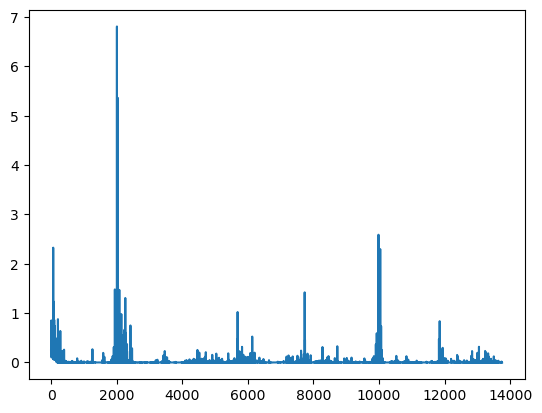

In [24]:
plt.plot(losses)
plt.show()

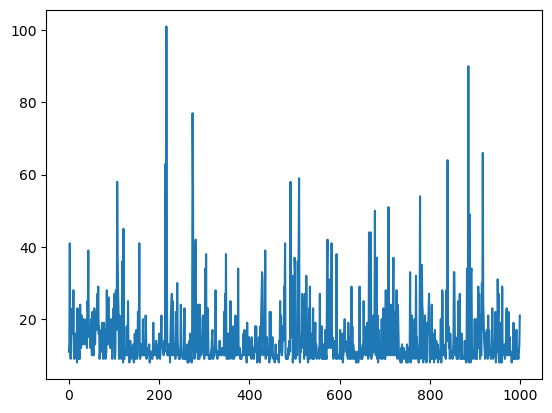

In [26]:
sums = [sum(dim) for dim in rewards]
plt.plot(sums)
plt.show()

In [27]:
env.close()

### Render

In [59]:
# env = gym.make('CartPole-v1', render_mode="human")

In [60]:
# env = gym.make('LunarLander-v2', render_mode="human")

In [61]:
# done = False

In [62]:
# test_reward = 0
# for i_episode in range(1000):
#     observation, _ = env.reset()
#     observation = torch.from_numpy(observation)
    
#     in_progress = True
    
#     while not done:
                
#         predicted_reward = model(observation)
#         action = torch.argmax(predicted_reward, dim=-1).item()
#         new_observation, reward, done, truncated, info = env.step(action)
#         test_reward += reward
#         # print(new_observation, reward, done, truncated, info)
#         # break
        
#         observation = torch.from_numpy(new_observation)

KeyboardInterrupt: 

In [ ]:
# env.close()

### Render

In [21]:
# predicted_reward = model(observation)

In [22]:
# predicted_reward

In [23]:
# action = torch.argmax(predicted_reward, dim=-1).item()

In [24]:
# action

In [28]:
# env = gym.make('CartPole-v1', render_mode="human")
# observation, _ = env.reset()
# observation = torch.from_numpy(observation)

# for t in range(1000):
#     predicted_reward = model(observation)
#     action = torch.argmax(predicted_reward, dim=-1).item()

#     new_observation, reward, done, truncated, info = env.step(action)

#     env.render()
#     print(f"t={t}, reward={reward}, done={done}")

#     if done:
#         # observation, _ = env.reset()
#         # observation = torch.from_numpy(observation)
#         break
#     else:
#         observation = torch.from_numpy(new_observation)

t=0, reward=1.0, done=False
t=1, reward=1.0, done=False
t=2, reward=1.0, done=False
t=3, reward=1.0, done=False
t=4, reward=1.0, done=False
t=5, reward=1.0, done=False
t=6, reward=1.0, done=False
t=7, reward=1.0, done=False
t=8, reward=1.0, done=True


In [26]:
env.close()

### Render 3

In [29]:
env = gym.make('CartPole-v1', render_mode="human")
observation, _ = env.reset()
observation = torch.from_numpy(observation)

done = False
t = 0
while not done:
    t += 1
    predicted_reward = model(observation)
    action = torch.argmax(predicted_reward, dim=-1).item()

    new_observation, reward, done, truncated, info = env.step(action)

    print(f"t={t}, reward={reward}, done={done}")

    if not done:
        observation = torch.from_numpy(new_observation)

t=1, reward=1.0, done=False
t=2, reward=1.0, done=False
t=3, reward=1.0, done=False
t=4, reward=1.0, done=False
t=5, reward=1.0, done=False
t=6, reward=1.0, done=False
t=7, reward=1.0, done=False
t=8, reward=1.0, done=False
t=9, reward=1.0, done=False
t=10, reward=1.0, done=False
t=11, reward=1.0, done=True
